In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random as rd

In [4]:
facebook = pd.read_csv('data/facebook_combined.txt.gz', compression='gzip', sep=' ', names=['start_node', 'end_node'])
facebook

,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


* The graph is created from the `facebook` dataframe of the edges:

In [5]:
G = nx.from_pandas_edgelist(facebook, 'start_node', 'end_node')

## Visualizing the graph

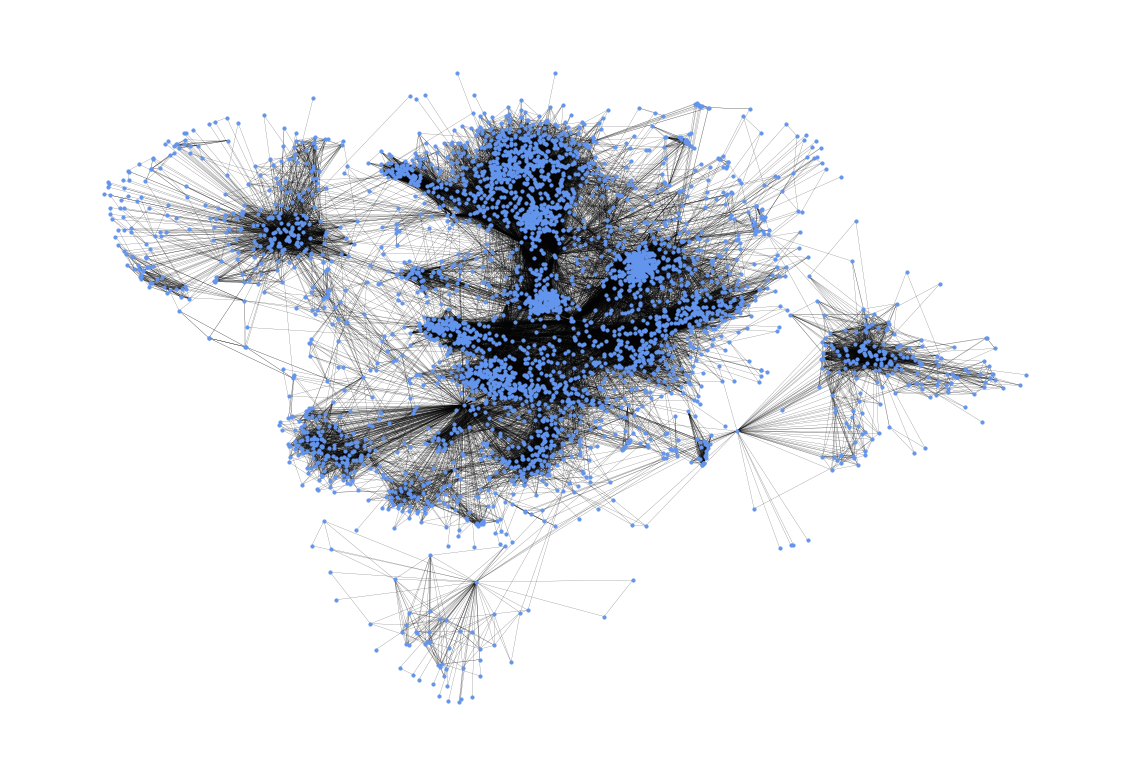

In [6]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(20, 14))
ax.axis('off')
nx.draw_networkx(G, pos=pos, ax=ax, node_size=10, with_labels=False, width=0.15, node_color='cornflowerblue')

# SICR model

In [7]:
sicr_color = dict()
sicr_color['s'] = 'limegreen'
sicr_color['i'] = 'red'
sicr_color['c'] = 'blue'
sicr_color['r'] = 'purple'
sicr_color

{'s': 'limegreen', 'i': 'red', 'c': 'blue', 'r': 'purple'}

In [8]:
N = G.number_of_nodes() # population

# probabilities
alpha = 0.7  
beta = 0.4
theta = 0.2
gamma = 0.5 
eta = 0.8

# time
start = 0
end = 10
dt = 0.01
t = np.arange(start, end, dt)
n = int((end-start)/dt)

In [9]:
color_map = np.empty(N).astype(str)

color_map[1:] = sicr_color['s']
color_map[0] = sicr_color['i']

In [10]:
for t in range(1, n):
    for i in range(N):
        rand_num = rd.random()
        # if node is susceptible and at least one neighboring node is infected
        if color_map[i] == sicr_color['s'] and sicr_color['i'] in [color_map[j] for j in [n for n in G.neighbors(i)]]:
            if rand_num < theta:
                color_map[i] = sicr_color['c']
            elif rand_num < beta:
                color_map[i] = sicr_color['r']
            elif rand_num < alpha:
                color_map[i] = sicr_color['i']
        # if node is infected and at least one neighboring node is infected
        elif color_map[i] == sicr_color['i'] and sicr_color['i'] in [color_map[j] for j in [n for n in G.neighbors(i)]]:
            if rand_num < gamma:
                color_map[i] = sicr_color['r']
#         # if node is counterattack and all neighboring nodes are infected
#         elif color_map[i] == sicr_color['c'] and all([sicr_color['i'] == color for color in [color_map[i] for i in [n for n in G.neighbors(i)]]]):
        # if node is counterattack and at least one neighboring nodes is infected
        elif color_map[i] == sicr_color['c'] and sicr_color['i'] in [color_map[j] for j in [n for n in G.neighbors(i)]]:
            if rand_num < eta:
                for n in G.neighbors(i):
                    if color_map[n] == sicr_color['i']:
                        color_map[n] = sicr_color['r']

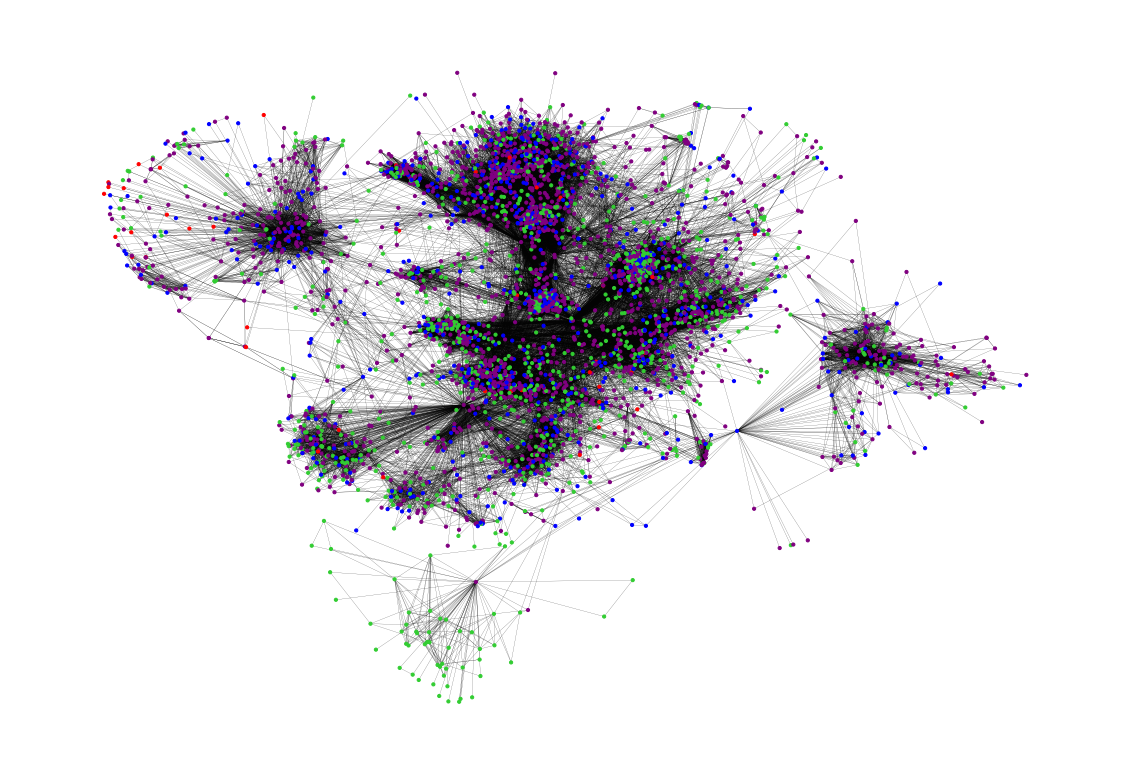

In [11]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(20, 14))
ax.axis('off')
nx.draw_networkx(G, pos=pos, ax=ax, node_size=10, with_labels=False, width=0.15, node_color=color_map)

In [12]:
num_s = 0
num_i = 0
num_c = 0
num_r = 0
for i in range(G.number_of_nodes()):
    num_s += sum([sicr_color['s']==color_map[i]])
    num_i += sum([sicr_color['i']==color_map[i]])
    num_c += sum([sicr_color['c']==color_map[i]])
    num_r += sum([sicr_color['r']==color_map[i]])
    
print('Fraction Susceptible = ', num_s/N)
print('Fraction Infective = ', num_i/N)
print('Fraction Counterattack = ', num_c/N)
print('Fraction Refractory = ', num_r/N)

Fraction Susceptible =  0.27927704877444914
Fraction Infective =  0.01138895766278782
Fraction Counterattack =  0.18940331765288437
Fraction Refractory =  0.5199306759098787
